   Timestamp  Serial Number       LGL  RGL       LTA       RTA       LBF  \
0      8.868       335043.0  0.029520  0.0  0.000000  0.011936  0.000000   
1      8.869       335044.0  0.030507  0.0  0.000474  0.012041  0.001075   
2      8.870       335045.0  0.031493  0.0  0.000946  0.012145  0.002145   
3      8.871       335046.0  0.032479  0.0  0.001416  0.012249  0.003211   
4      8.872       335047.0  0.033465  0.0  0.001885  0.012352  0.004272   

        RBF  LRF       RRF  
0  0.007329  0.0  0.000000  
1  0.007492  0.0  0.001437  
2  0.007654  0.0  0.002946  
3  0.007816  0.0  0.004443  
4  0.007977  0.0  0.005929  


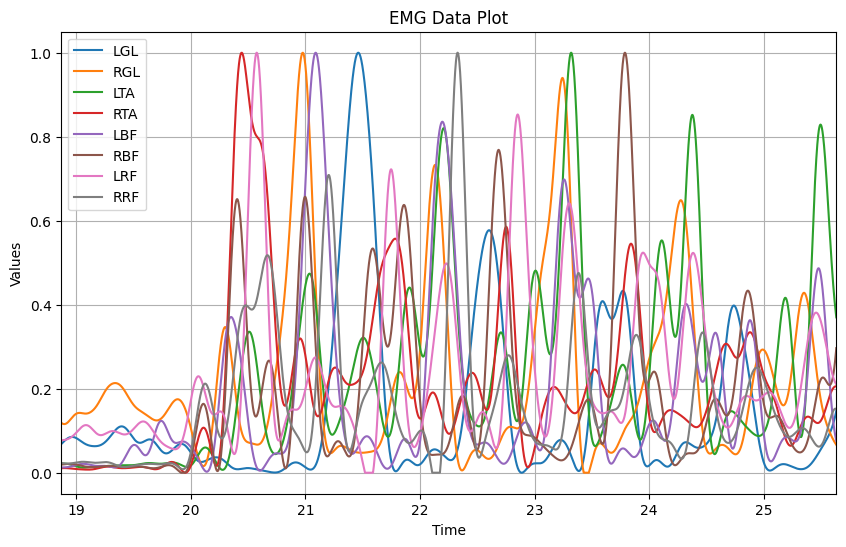

In [21]:
import pandas as pd

csv_file_path = 'C:/Users/sean9/Desktop/ExoskeletonPowerAsistance/simulation/CEINMS/unprocessed data/cutted_EMG_data.csv'

csv_data = pd.read_csv(csv_file_path)
print(csv_data.head())

if 'Serial Number' in csv_data.columns:
    csv_data = csv_data.drop(columns=['Serial Number'])

import matplotlib.pyplot as plt
csv_data.plot(x='Timestamp', figsize=(10, 6))

plt.title('EMG Data Plot')
plt.xlabel('Time')
plt.xlim(8.868+10, 16.766667+8.868)
plt.ylabel('Values')
plt.grid(True)
plt.show()

(19374, 9)
(570, 8)


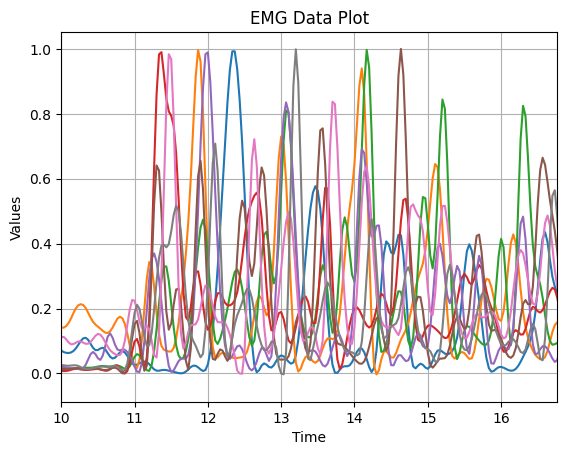

In [22]:
from scipy.signal import resample
import numpy as np

sfreq = 30
secs = round(csv_data.shape[0]/1000)
samps = secs*sfreq
resampled_emg = resample(csv_data, samps, axis=0)
resampled_emg = np.delete(resampled_emg, 0, axis=1)
print(csv_data.shape)
print(resampled_emg.shape)
t = np.arange(resampled_emg.shape[0]) / 30
plt.title('EMG Data Plot')
plt.plot(t,resampled_emg)
plt.xlabel('Time')
plt.ylabel('Values')
plt.xlim(10,16.766667)
plt.grid(True)
plt.show()      

In [30]:
csv_columns = ['LGL', 'RGL', 'LTA', 'RTA', 'LBF', 'RBF', 'LRF', 'RRF']
sto_columns = ['gastroc_l', 'gastroc_r', 'tib_ant_l', 'tib_ant_r', 'hamstrings_l', 'hamstrings_r', 'rect_fem_l', 'rect_fem_r']

sto_file = 'C:/Users/sean9/Desktop/ExoskeletonPowerAsistance/simulation/CEINMS/output/resampled_emg_custom_time.sto'
# 計算樣本數量
num_samples = len(resampled_emg)

# 設置 STO 文件的標頭
header = f"""version=1
nRows={num_samples}
nColumns={len(sto_columns) + 1}
inDegrees=no

Units are S.I. units (second, meters, Newtons, ...)
endheader
time	{'	'.join(sto_columns)}
"""

# 將數據寫入 STO 文件
with open(sto_file, 'w') as f:
    f.write(header)
    
    resampled_time = np.linspace(0, secs, num_samples)
    for i in range(num_samples):
        row = [f"{resampled_time[i]:.6f}"]
        row += [f"{resampled_emg[i, j]:.6f}" for j in range(len(sto_columns))]
        f.write('\t'.join(row) + '\n')

print(f"EMG data saved to: {sto_file}")

EMG data saved to: C:/Users/sean9/Desktop/ExoskeletonPowerAsistance/simulation/CEINMS/output/resampled_emg_custom_time.sto


In [33]:
import pandas as pd
def extract_and_sort_sto_data(file_path, start_time, end_time, output_file):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    header_lines = lines[:7]
    df = pd.read_csv(file_path, delim_whitespace=True, comment='%', skiprows=7)
    if 'time' not in df.columns:
        raise ValueError("The .sto file does not contain a 'time' column.")
    df_filtered = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
    df_sorted = df_filtered.sort_values(by='time').reset_index(drop=True)
    original_time_diff = df_sorted['time'].diff().dropna().mean()
    df_sorted['time'] = (1/30) + df_sorted.index * original_time_diff
    df_sorted['time'] = df_sorted['time'].round(6)
    with open(output_file, 'w') as f_out:
        f_out.writelines(header_lines)
        df_sorted.to_csv(f_out, index=False, sep='\t', lineterminator='\n')

file_path = 'C:/Users/sean9/Desktop/ExoskeletonPowerAsistance/simulation/CEINMS/output/resampled_emg_custom_time.sto'
start_time = 12.066667
end_time = 16.766667
output_file = 'C:/Users/sean9/Desktop/ExoskeletonPowerAsistance/simulation/CEINMS/output/emg_cut.sto'

extract_and_sort_sto_data(file_path, start_time, end_time, output_file)


C:\Users\sean9\AppData\Local\Temp\ipykernel_21224\1711056825.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, comment='%', skiprows=7)


       time  gastroc_l  gastroc_r  tib_ant_l  tib_ant_r  hamstrings_l  \
0  0.033333   0.131701   0.081220   0.155482   0.183351      0.739187   
1  0.066725   0.218798   0.048512   0.101909   0.223143      0.559868   
2  0.100117   0.324609   0.049644   0.090959   0.247057      0.392162   
3  0.133509   0.444719   0.059526   0.106456   0.248367      0.254847   
4  0.166901   0.574479   0.064019   0.132668   0.234039      0.153626   

   hamstrings_r  rect_fem_l  rect_fem_r  
0      0.045123    0.205108    0.649495  
1      0.042085    0.174882    0.708244  
2      0.060535    0.158630    0.623388  
3      0.074265    0.157603    0.438534  
4      0.070484    0.158639    0.241283  


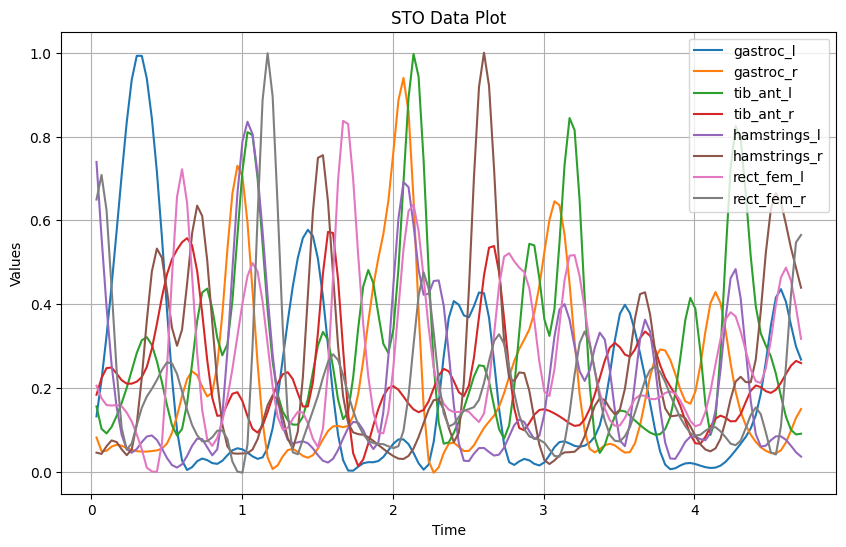

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

sto_file_path = 'C:/Users/sean9/Desktop/ExoskeletonPowerAsistance/simulation/CEINMS/output/emg_cut.sto'

sto_data = pd.read_csv(sto_file_path, delimiter='\t', skiprows=7)

print(sto_data.head())

sto_data.plot(x='time', figsize=(10, 6))

plt.title('STO Data Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()      